# EDA



## Exploratory Data Analysis

To get better insights into our data we want to do some exploratory data analysis. The aim is to deepen our understanding. 

The way to do it is to come up with some initial hypotheses, that we then want to test using out data. 

__What are good hypotheses?__ _Everthing we beliefe to be true about our data before looking_

## Recap
Last time plotted the date for visual inspection. The data was heat power or heat flow from a communal heat plant delivering heat to some 60 houses. We found that the data shows seasonal yearly and dayly variations. Let's Load the data again...

In [11]:
import pandas as pd

In [4]:

df = pd.read_csv("../data/heat_with_datetime.csv")
df.Timestamp = pd.to_datetime(df.Timestamp, infer_datetime_format=True, utc=True).dt.tz_convert(tz="Europe/Berlin")
df

,Timestamp,heat_power,flow_rate,leader_temp,return_temp
0,2020-01-01 00:15:00+01:00,713.000,17650.000,81.000,46.000
1,2020-01-01 00:30:00+01:00,330.000,9600.000,81.000,51.000
2,2020-01-01 00:45:00+01:00,705.000,16730.000,81.000,44.000
3,2020-01-01 01:00:00+01:00,663.000,16890.000,81.000,47.000
4,2020-01-01 01:15:00+01:00,412.000,10690.000,81.000,48.000
...,...,...,...,...,...
102715,2022-12-07 23:00:00+01:00,488.286,23120.000,78.286,59.714
102716,2022-12-07 23:15:00+01:00,524.625,23136.250,79.375,59.500
102717,2022-12-07 23:30:00+01:00,435.143,21630.000,79.571,62.143
102718,2022-12-07 23:45:00+01:00,534.500,24685.000,78.750,59.750


## Initial hypotheses generation

What are good initial hypotheses? Everthing we beliefe to be true about our data before looking. it can range from the obvieous to the obscure. __Rule of thumb: Don't beliefe anything without proof!__ Nothing is too apparently true to prove it. If it is true, we can proove it. 

For this case, let's test the following hypotheses:
* Heat demand is larger in winter than in summer
* Heat demand is largest in the early morning hours (heating buildings up after the night, shower before work)
* I assume leader temperature and return temperature to be more or less stable, so heat power should correlate with (volume) flow rate. (These are actually three seperate)
* heat power should be proportional to temperature difference times flow rate

At this point, all of these hypotheses could be true or not. let's find out!

## Hypothesis testing


### Heat demand is larger in winter than in summer

In [6]:
# create a month column
df["month"] = df.Timestamp.dt.month
df

,Timestamp,heat_power,flow_rate,leader_temp,return_temp,month
0,2020-01-01 00:15:00+01:00,713.000,17650.000,81.000,46.000,1
1,2020-01-01 00:30:00+01:00,330.000,9600.000,81.000,51.000,1
2,2020-01-01 00:45:00+01:00,705.000,16730.000,81.000,44.000,1
3,2020-01-01 01:00:00+01:00,663.000,16890.000,81.000,47.000,1
4,2020-01-01 01:15:00+01:00,412.000,10690.000,81.000,48.000,1
...,...,...,...,...,...,...
102715,2022-12-07 23:00:00+01:00,488.286,23120.000,78.286,59.714,12
102716,2022-12-07 23:15:00+01:00,524.625,23136.250,79.375,59.500,12
102717,2022-12-07 23:30:00+01:00,435.143,21630.000,79.571,62.143,12
102718,2022-12-07 23:45:00+01:00,534.500,24685.000,78.750,59.750,12


In [12]:
# test heat flow over month column
heat_per_month = df[["heat_power", "month"]].groupby("month").mean().reset_index()
heat_per_month

,month,heat_power
0,1,541.924145
1,2,468.593166
2,3,428.419350
3,4,330.996363
4,5,231.773948
5,6,159.347431
6,7,139.328958
7,8,136.037884
8,9,178.122322
9,10,279.619310


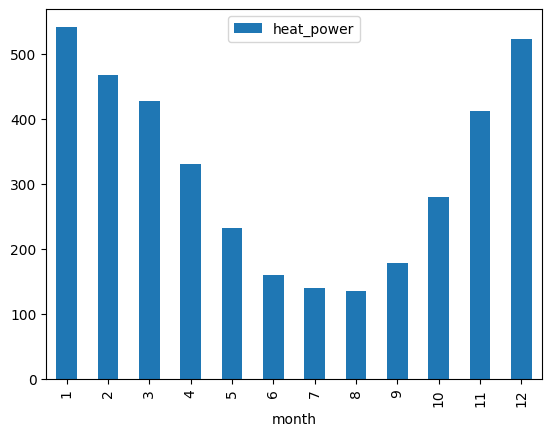

In [19]:
heat_per_month.plot.bar(x="month", y="heat_power");

Very clearly, we need more heat in the winter month, as eypected. No surprize here.

### Heat demand is largest in the early morning hours

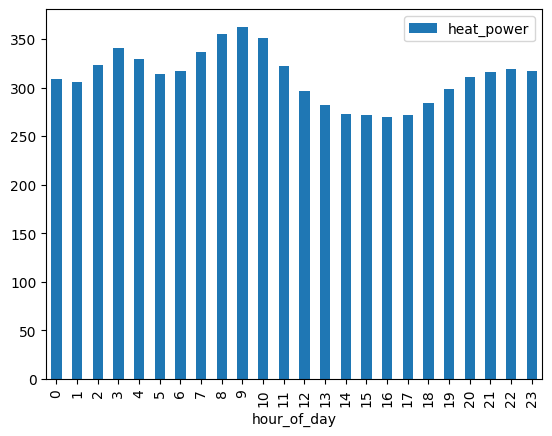

In [18]:
# create hour column, test heat demand over hour of day
df["hour_of_day"] = df.Timestamp.dt.hour
heat_per_hour = df[["heat_power", "hour_of_day"]].groupby("hour_of_day").mean().reset_index()
heat_per_hour.plot.bar(x="hour_of_day", y="heat_power");

We actually see two peaks, one around 3 am, the other around 9 am, which is both earlyer and later than I would have thunk. We then have a dip in the afternoon and then higher values during evening and night. The differences are less pronounced than expected.

### Leader temperature and return temperature are more or less stable

In [20]:
# just look at .describe()
df[["leader_temp", "return_temp"]].describe()

,leader_temp,return_temp
count,100407.000000,100407.000000
mean,80.669413,60.028123
std,2.454392,4.824667
min,21.250000,42.000000
25%,81.000000,57.000000
50%,81.375000,60.000000
75%,82.000000,63.429000
max,89.000000,85.000000


Leader temperature appears to be quite stable with a mean of 80.7° and an std of 2.45°. Return temperature a bit less so with a mean of 60.0° and std of 4.82°. There seem to be outliers. 

### Heat power correlates with (volume) flow rate.

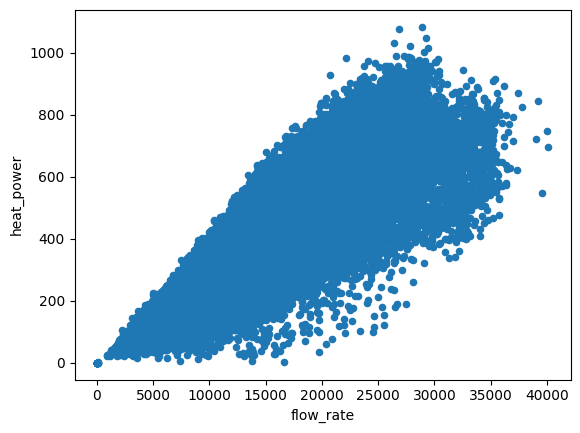

In [22]:
df.plot.scatter(x="flow_rate", y="heat_power");

There appears to be a strong correlation. We should have a closer look to see how strong it is. (but we won't do it now.)

### Heat power should be proportional to temperature difference times flow rate

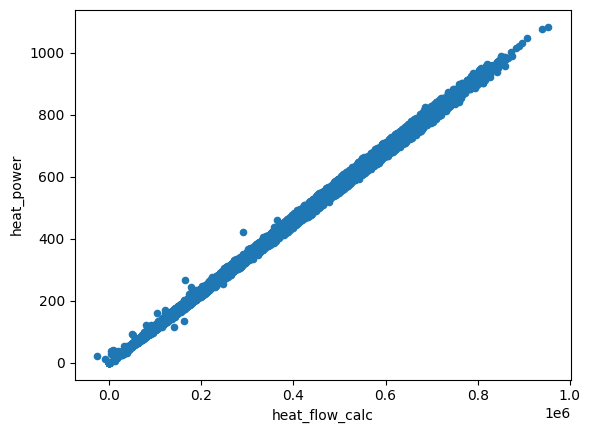

In [24]:
df["heat_flow_calc"] = (df.leader_temp - df.return_temp) * df.flow_rate
df.plot.scatter(x="heat_flow_calc", y="heat_power");

Yep, that's pretty much a straight line.

## Conclusion

* __Heat demand is larger in winter than in summer__ - _Sure thing_
* __Heat demand is largest in the early morning hours__ - _True but less pronounced and more complicated_
* __Leader temperature and return temperature are stable__ - _mostly_
* __Heat power correlates with (volume) flow rate__ - _for the most part, but not too stricly_
* __Heat power is proportional to temperature difference times flow rate__ - _yes, absolutely_